1_Read dataset
2_Encoding
3_Normalization
4_Train_test_split
5_Train_model


In [1]:
import pandas as pd

from Projects.Functions.Config_Loader.config_loader import *
from Projects.Functions.Features_Engineering.features_engineering import *
from Projects.Functions.Modelisation.modelisation import *
from Projects.Functions.Models_generation.models_generation import *
from Projects.Functions.Report.report import *
from Projects.Functions.Pipeline_Modelisation.pipeline_modelisation import *


In [2]:
config=ConfigLoader(r"C:\Users\tallar\Documents\PROJETS\EDA_and_ML\Projects\Configs\Config.json")

In [3]:
dataset=config.get_dataset_path()
print(f"dataset_path : {dataset}")
cible=config.get_project_target()
print(f"cible : {cible}")
modele_type=config.get_model_type()
print(f"model_type : {modele_type}")
test_fraction=config.get_test_fraction()
print(f"test_fraction : {test_fraction}")
model_path=config.get_model_path()
print(f"model_path : {model_path}")
alpha = config.get_alpha()
print(f"alpha : {alpha}")
correlation_limit = config.get_corr_limit()
print(f"correlation_limit : {correlation_limit}")
cross_validation =config.get_cross_validation()
print(f"cross_validation : {cross_validation}")
file_name =config.get_dataset_filename()
print(f"file_name : {file_name}")
columns_to_delete = config.get_deleted_columns()
print(f"columns_to_delete : {columns_to_delete}")
features_path = config.get_features_json_path()
print(f"features_path : {features_path}")
figure_path = config.get_figure_path()
print(f"figure_path : {figure_path}")
model_api_path=config.get_model_api_path()
print(f"model_api_path : {model_api_path}")
k_fold = config.get_fold_count()
print(f"k_fold : {k_fold}")
pca_dim = config.get_pca_dim()
print(f"pca_dim : {pca_dim}")
pca_variance = config.get_pca_variance()
print(f"pca_variance : {pca_variance}")
pca=config.use_pca()
delete_columns = config.get_deleted_columns()

dataset_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Data/cancer.csv
cible : diagnosis
model_type : classification
test_fraction : 0.2
model_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Models/
alpha : 0.05
correlation_limit : 0.4
cross_validation : False
file_name : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Data/cancer.csv
columns_to_delete : ['SEQN', 'RIDAGEYR', 'id', 'No', 'Id', 'Column1', 'PassengerId', 'Name', 'Ticket', 'Cabin']
features_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Features/API/features.json
figure_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Figures/
model_api_path : C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Models/API/
k_fold : 3
pca_dim : 5
pca_variance : 0.95


In [4]:
project_name="cancer"
project_name = project_name + " version_"+ str(datetime.now().year) +"_"+ str(datetime.now().month) +"_"+ str(datetime.now().day) +"_"+datetime.now().strftime("%H%M%S")
report=Report(project_name)

In [5]:
df= dataset_reading(dataset)
df=dataset_drop_unused_columns(df,delete_columns)
cible=cible
raw_features=df.drop(cible, axis=1)
raw_features= dataset_object_to_categorical(raw_features)
raw_features=dataset_na_fill(raw_features, cible)
raw_targets=df[cible]

count       int64
class    category
dtype: object


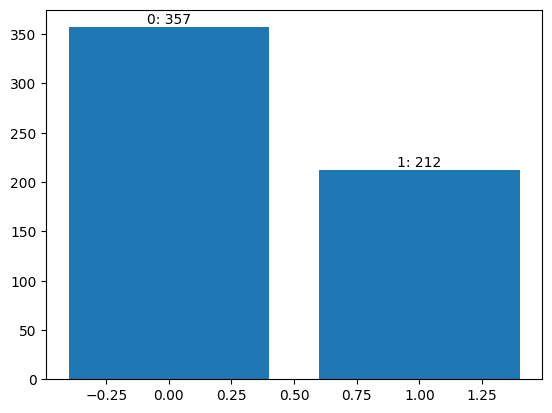

In [6]:
if modele_type=="classification":
    dataset_target_representation(df,cible)

In [7]:
df = dataset_object_to_categorical(df)
df=dataset_na_fill(df,cible)

In [8]:

features, target = encoding_categorical_features(df,cible)


[]
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0           1799          1038            1228       1001             1184   
1           2057          1777            1329       1326             8474   
2           1969          2125             130       1203             1096   
3           1142          2038            7758       3861             1425   
4           2029          1434            1351       1297             1003   
..           ...           ...             ...        ...              ...   
564         2156          2239             142       1479              111   
565         2013          2825            1312       1261              978   
566          166          2808            1083       8581             8455   
567          206          2933            1401       1265             1178   
568          776          2454            4792        181             5263   

     compactness_mean  concavity_mean  concave points_mean  

In [9]:
features_train, features_test, target_train, target_test = split_dataset(features,target,test_fraction,42)

Nombre de dimensions intrinsèques (pour 0.95 de variance): 1


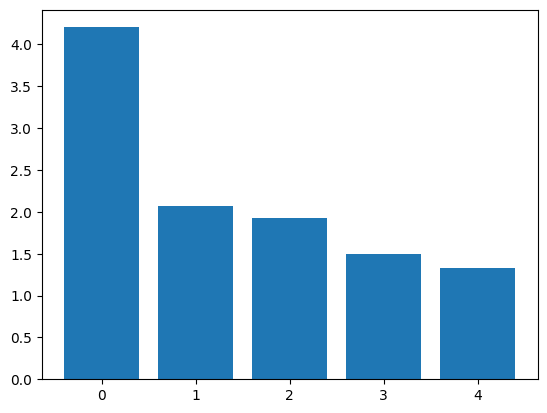

[4.20443283 2.07250279 1.92822316 1.50216766 1.33416962]
5


In [10]:
features, features_train_scaled, features_test_scaled = scale_features(features_train,features_test)
if pca==True:
    features_train, features_test, n_composantes = PCA_dimension_reduction(features_train_scaled,features_test_scaled,pca_variance,pca_dim)

In [11]:
modeles=generate_list_of_models(modele_type)

ok
[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4558
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\Users\tallar\Documents\PROJETS\EDA_and_ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\tallar\Documents\PROJETS\EDA_and_ML\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.
Ce modèle ne dispose pas d'un attribut `loss_curve_`.


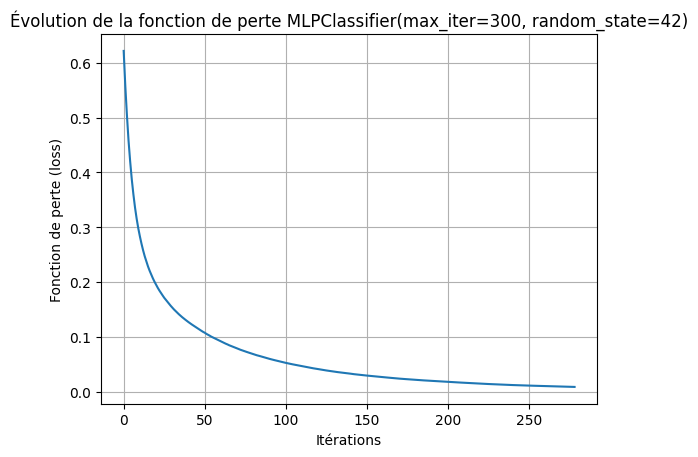

10
[['Modele', 'Recall', 'F1-Score', 'Accuracy', 'Precision'], ['lightgbm', '0.93', '0.952', '0.965', '0.976'], ['xgboost', '0.93', '0.952', '0.965', '0.976'], ['adaboost', '0.86', '0.881', '0.912', '0.902'], ['gradientboost', '0.93', '0.964', '0.974', '1.0'], ['histgboost', '0.953', '0.965', '0.974', '0.976'], ['randomForest', '0.907', '0.951', '0.965', '1.0'], ['logreg', '0.907', '0.907', '0.93', '0.907'], ['knn', '0.86', '0.902', '0.93', '0.949'], ['tree', '0.884', '0.864', '0.895', '0.844'], ['mlp', '0.93', '0.92', '0.939', '0.909']]


In [12]:
pipeline_model, predictions, recall,accuracy,f1score,precision,mse, r2, tab_modele, dict_modeles =training_machine_learning_models(modele_type,modeles,False, features_train_scaled,features_test_scaled,target_train,target_test)

print(tab_modele)

lightgbm


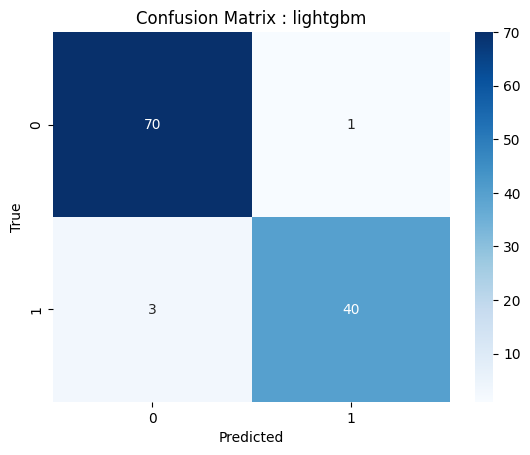

xgboost


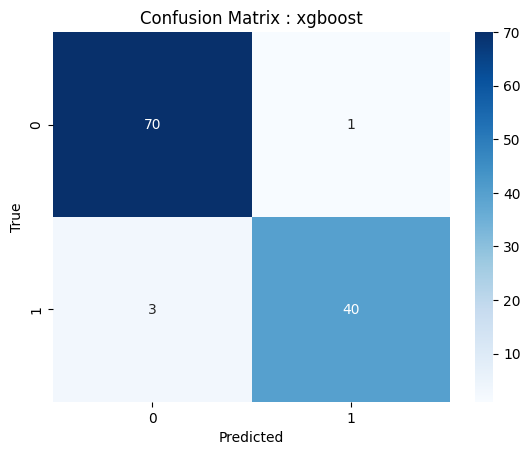

adaboost


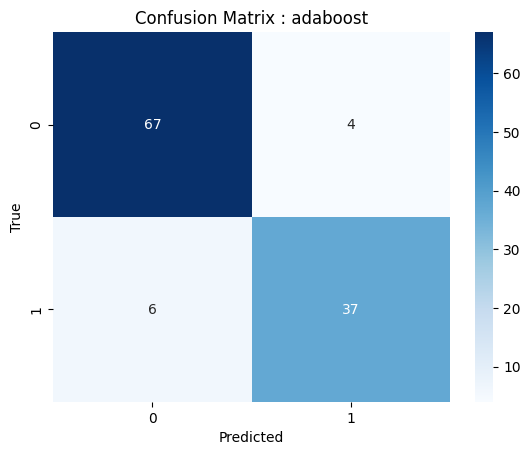

gradientboost


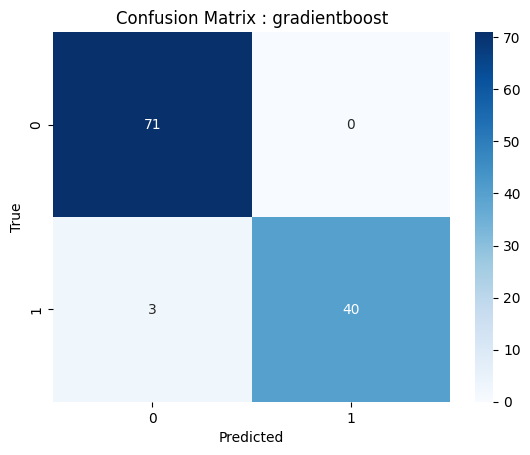

histgboost


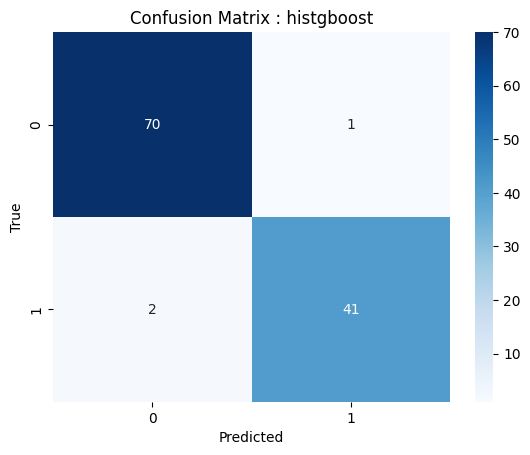

randomForest


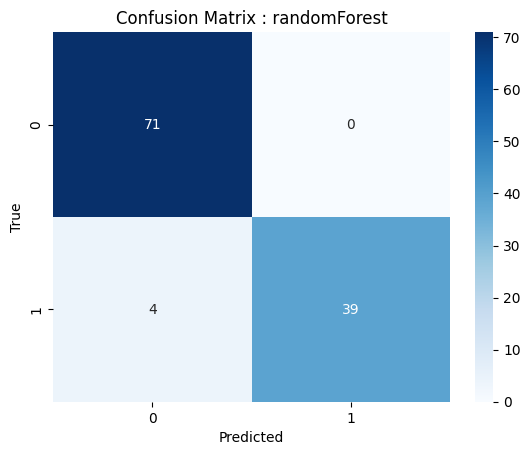

logreg


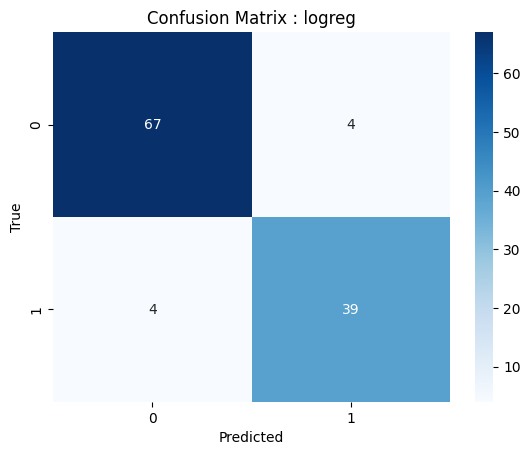

knn


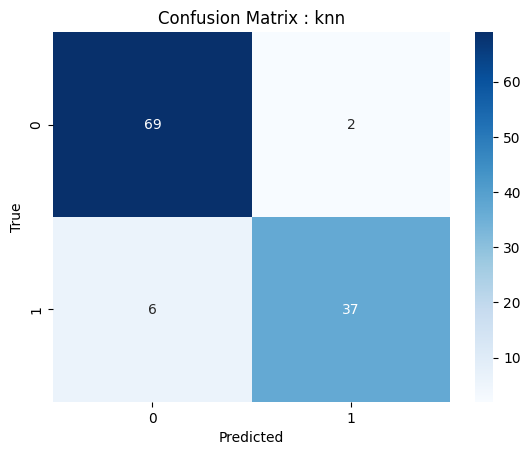

tree


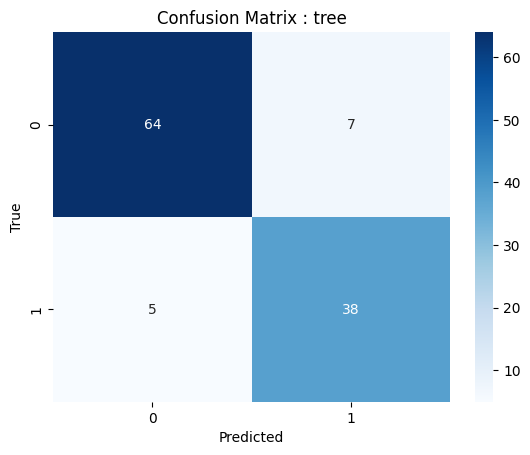

mlp


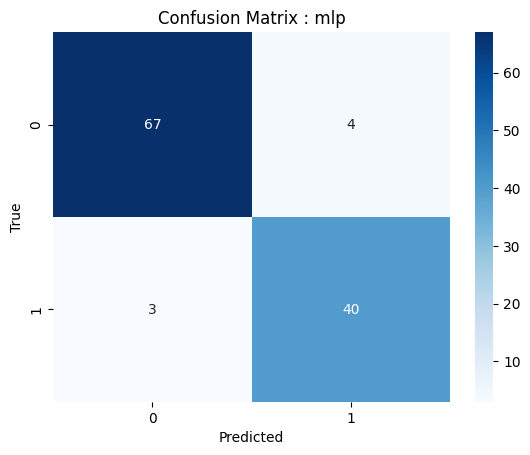

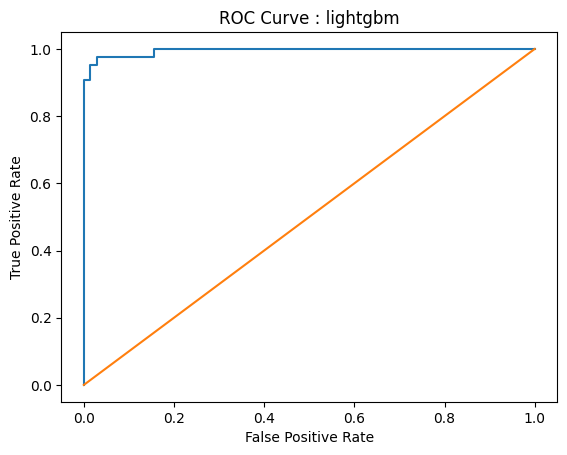

lightgbm


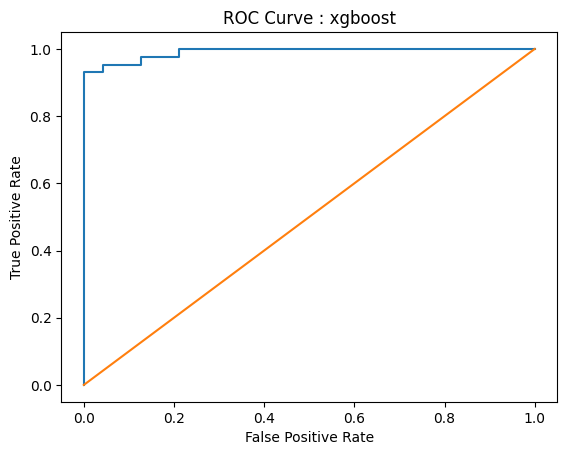

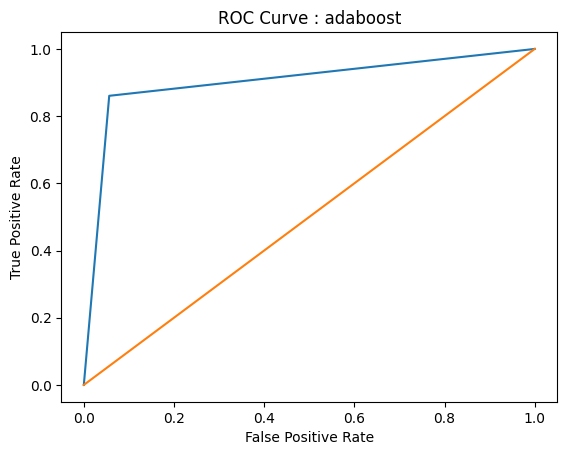

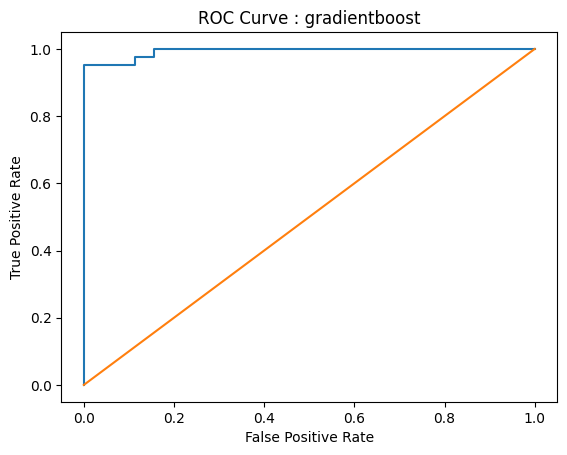

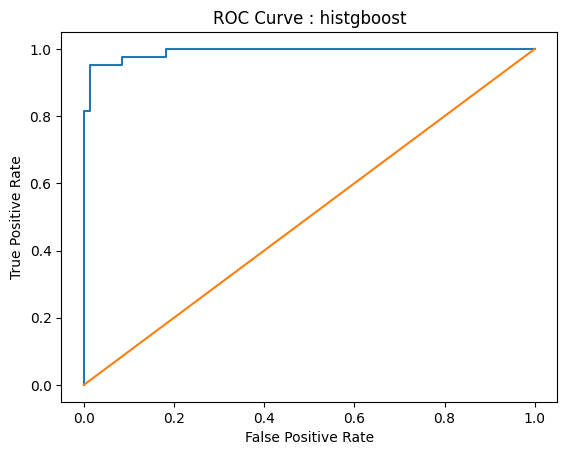

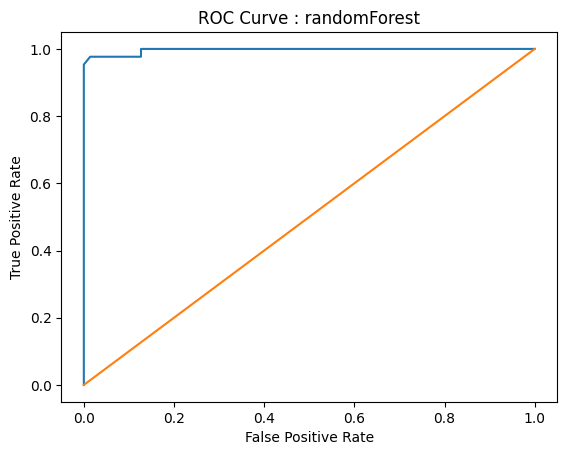

randomForest


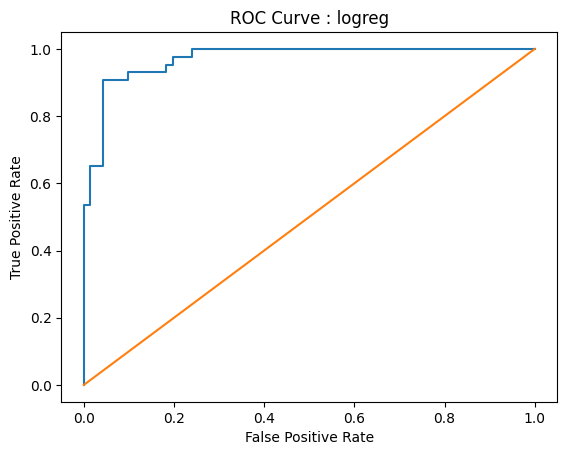

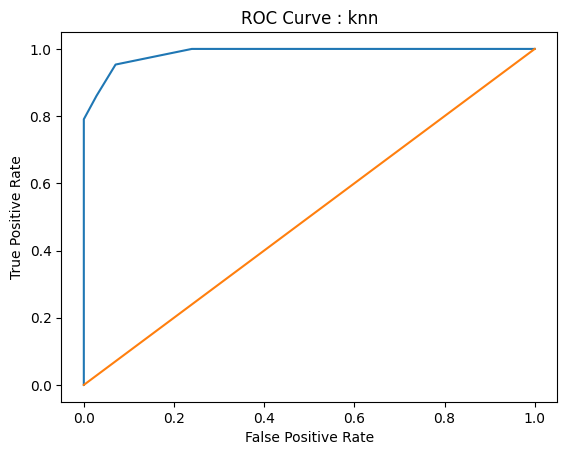

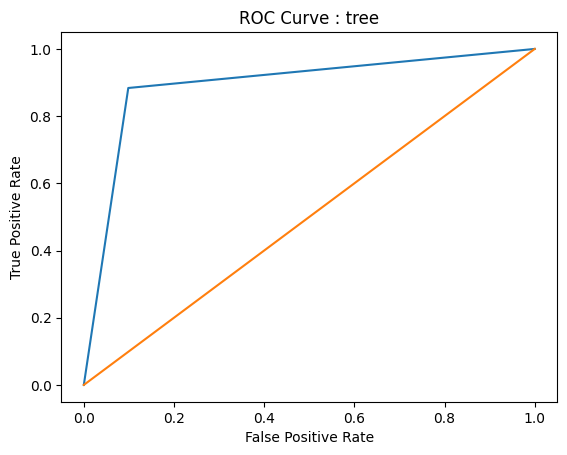

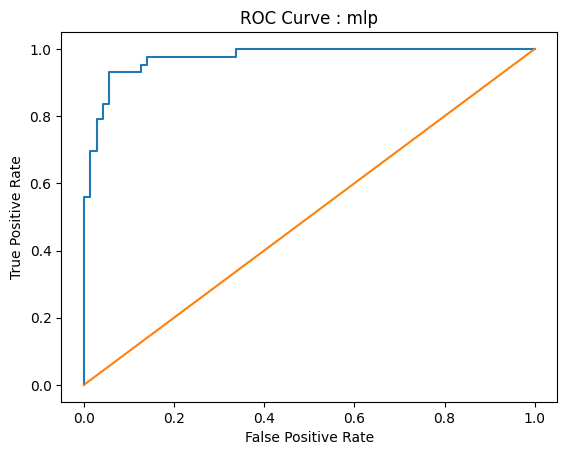

In [13]:
best_modele, pipeline_best_model, best = evaluation_of_trained_models(predictions , dict_modeles,pipeline_model, modele_type, target_test, recall,accuracy,f1score,precision,mse, r2, tab_modele, figure_path)

In [14]:
pd.DataFrame(predictions).head()

,0,1,2
0,lightgbm,"[0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...","[0.013708605896743565, 0.9999313280330867, 0.9..."
1,xgboost,"[0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...","[0.028073281, 0.9978301, 0.98741734, 0.0015662..."
2,adaboost,"[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, ...","[0.11920292202211755, 0.8807970779778823, 0.88..."
3,gradientboost,"[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, ...","[0.0036301311463324826, 0.9975189162110457, 0...."
4,histgboost,"[0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...","[0.04448602999689072, 0.9998160057688668, 0.98..."


In [15]:
print(best)

randomForest


In [16]:
results = generate_results(tab_modele,modele_type)

In [17]:
results.head()

,Modele,Recall,F1-Score,Accuracy,Precision
5,randomForest,0.907,0.951,0.965,1.000
3,gradientboost,0.930,0.964,0.974,1.000
1,xgboost,0.930,0.952,0.965,0.976
0,lightgbm,0.930,0.952,0.965,0.976
4,histgboost,0.953,0.965,0.974,0.976


In [18]:
report.doc_add_table(results)

In [19]:
print(config.get_report_path())

C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Reports/


In [20]:
pipeline = build_the_final_pipeline(pipeline_best_model,raw_features,raw_targets,cible,pca,pca_dim)

In [21]:
saving_of_best_model_for_production(model_path,model_api_path,pipeline,best,project_name)

C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Models/cancer version_2025_7_22_140335_randomForest_pipeline_model.joblib
C:/Users/tallar/Documents/PROJETS/EDA_and_ML/Projects/Project_ML/Repositories/Models/API/cancer version_2025_7_22_140335_randomForest_pipeline_model.joblib


In [22]:
generate_data_contract_for_frontEnd(raw_features,features_path)

{'radius_mean': 'int64  : values = [ 9 to 9904 ]', 'texture_mean': 'int64  : values = [ 17 to 3928 ]', 'perimeter_mean': 'int64  : values = [ 63 to 9958 ]', 'area_mean': 'int64  : values = [ 181 to 9989 ]', 'smoothness_mean': 'int64  : values = [ 1 to 9997 ]', 'compactness_mean': 'int64  : values = [ 6 to 9965 ]', 'concavity_mean': 'int64  : values = [ 0 to 9966 ]', 'concave points_mean': 'int64  : values = [ 0 to 9961 ]', 'symmetry_mean': 'int64  : values = [ 18 to 2906 ]', 'fractal_dimension_mean': 'int64  : values = [ 6 to 9744 ]', 'radius_se': 'int64  : values = [ 1 to 9948 ]', 'texture_se': 'int64  : values = [ 12 to 9988 ]', 'perimeter_se': 'int64  : values = [ 2 to 9975 ]', 'area_se': 'int64  : values = [ 14 to 9904 ]', 'smoothness_se': 'int64  : values = [ 1 to 9976 ]', 'compactness_se': 'int64  : values = [ 12 to 9947 ]', 'concavity_se': 'int64  : values = [ 0 to 9959 ]', 'concave points_se': 'int64  : values = [ 0 to 9997 ]', 'symmetry_se': 'int64  : values = [ 15 to 9947 ]',

In [23]:
report.report_builder(config.get_report_path())